In [ ]:
#@title Librerias usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title Montar el dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Mostrar el dataset
dataset = pd.read_csv("/content/drive/MyDrive/database1.csv")
dataset.head(5)

date  year    month  number_month       day  number_day  \
0  01/01/2010  2010  January             1    Friday           1   
1  01/02/2010  2010  January             1  Saturday           2   
2  01/03/2010  2010  January             1    Sunday           3   
3  01/04/2010  2010  January             1    Monday           4   
4  01/05/2010  2010  January             1   Tuesday           5   

   interpersviolence  homicides  maxtemp  humid  precipitations  windspeed  \
0                 31          2       33     78             0.0       15.4   
1                  6          0       32     82             0.0       16.5   
2                  8          1       32     76             0.0       14.8   
3                  7          0       34     81             0.0       10.7   
4                  3          2       35     83             0.0       13.5   

   moonlight  holidays  weekends  fines  vehicles  heatindex  
0      1.000         1         0      2         0    26.2516  
1      0.987         0         1     13         0    30.4034  
2      0.944         0         1     11         0    29.7769  
3      0.876         0         0      0        13    30.0638  
4      0.787         0         0      0         1    30.0271

In [ ]:
#@title Modificar el formato fecha
dataset["date"]=pd.to_datetime(dataset["date"])
dataset.head(5)

date  year    month  number_month       day  number_day  \
0 2010-01-01  2010  January             1    Friday           1   
1 2010-01-02  2010  January             1  Saturday           2   
2 2010-01-03  2010  January             1    Sunday           3   
3 2010-01-04  2010  January             1    Monday           4   
4 2010-01-05  2010  January             1   Tuesday           5   

   interpersviolence  homicides  maxtemp  humid  precipitations  windspeed  \
0                 31          2       33     78             0.0       15.4   
1                  6          0       32     82             0.0       16.5   
2                  8          1       32     76             0.0       14.8   
3                  7          0       34     81             0.0       10.7   
4                  3          2       35     83             0.0       13.5   

   moonlight  holidays  weekends  fines  vehicles  heatindex  
0      1.000         1         0      2         0    26.2516  
1      0.987         0         1     13         0    30.4034  
2      0.944         0         1     11         0    29.7769  
3      0.876         0         0      0        13    30.0638  
4      0.787         0         0      0         1    30.0271

<ipython-input-6-3997cb4626f9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_dataset = dataset.corr()


<Axes: >

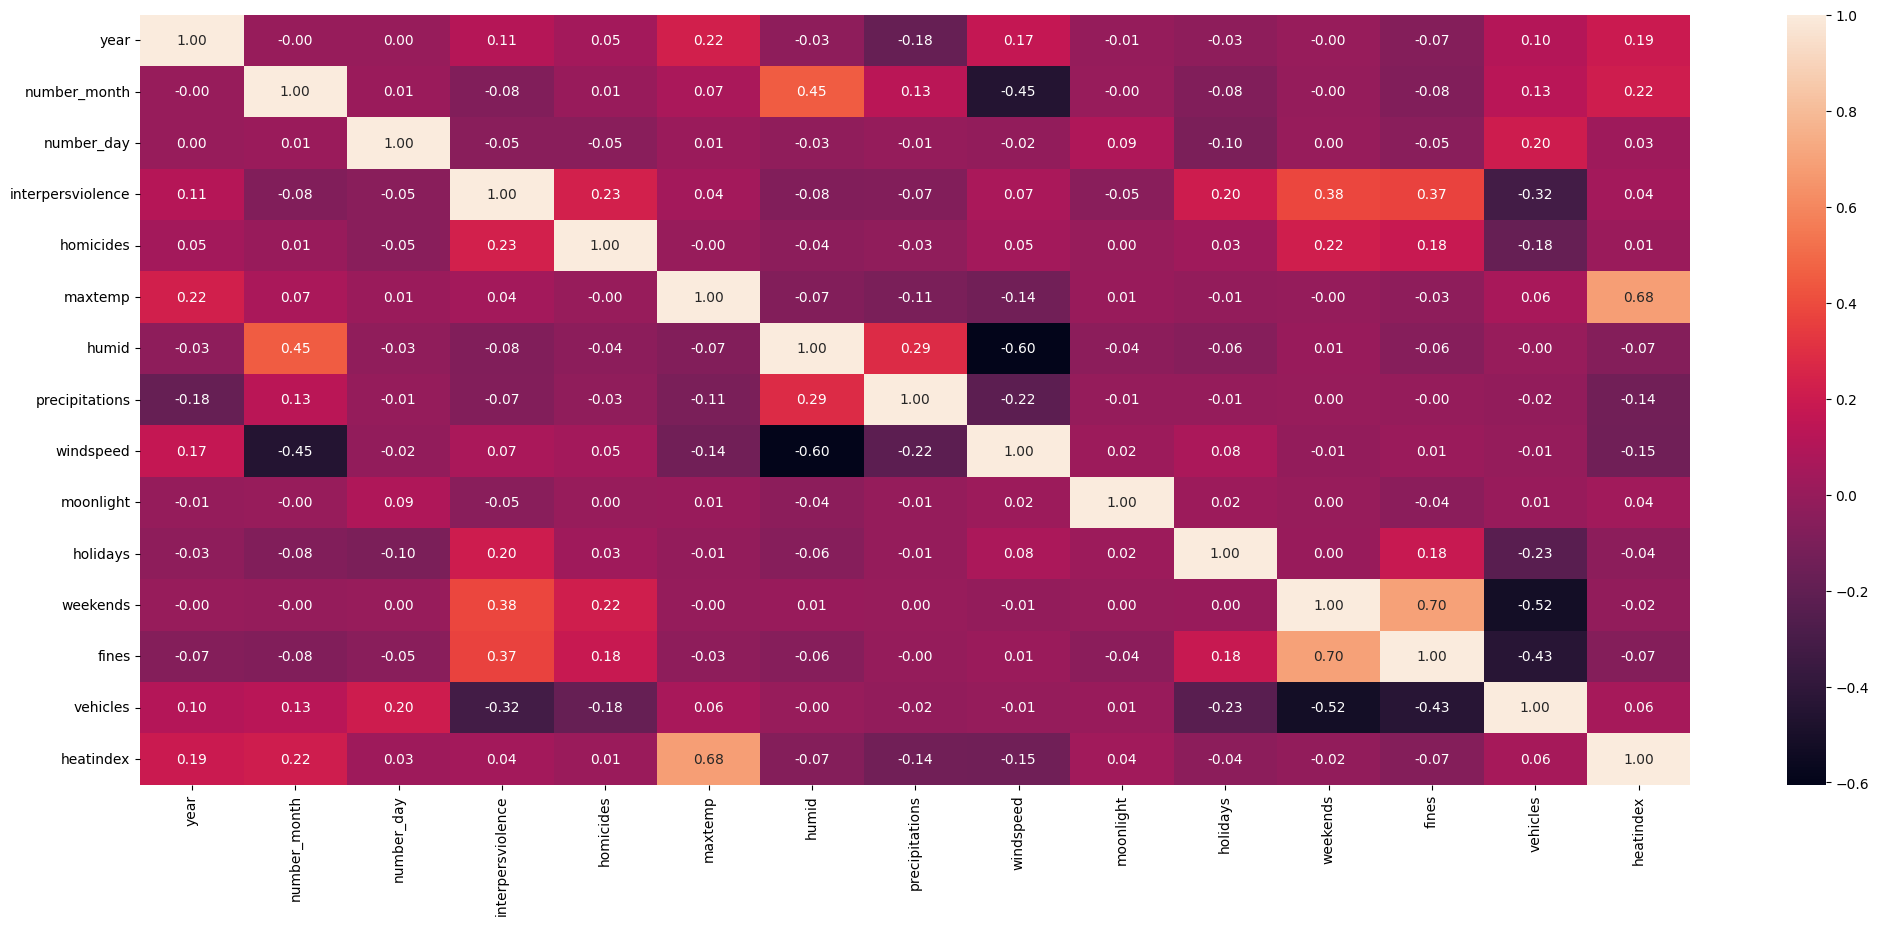

In [ ]:
#@title Matriz de coorelación
plt.subplots(figsize=(25,10))
correlacion_dataset = dataset.corr()
sns.heatmap(correlacion_dataset, annot=True, fmt=".2f")

In [ ]:
#@title Mostrar promedio
print(dataset['homicides'].mean())

1.0019554165037152


In [ ]:
#@title Promedio de homicidios por año
homicidios_año= dataset.groupby(['year'])['homicides'].sum()
homicidios_año

year
2010    381
2011    328
2012    349
2013    315
2014    360
2015    431
2016    398
Name: homicides, dtype: int64

In [ ]:
#@title Total de homicidios
print(dataset['homicides'].sum())

2562


Text(0, 0.5, 'Cantidad')

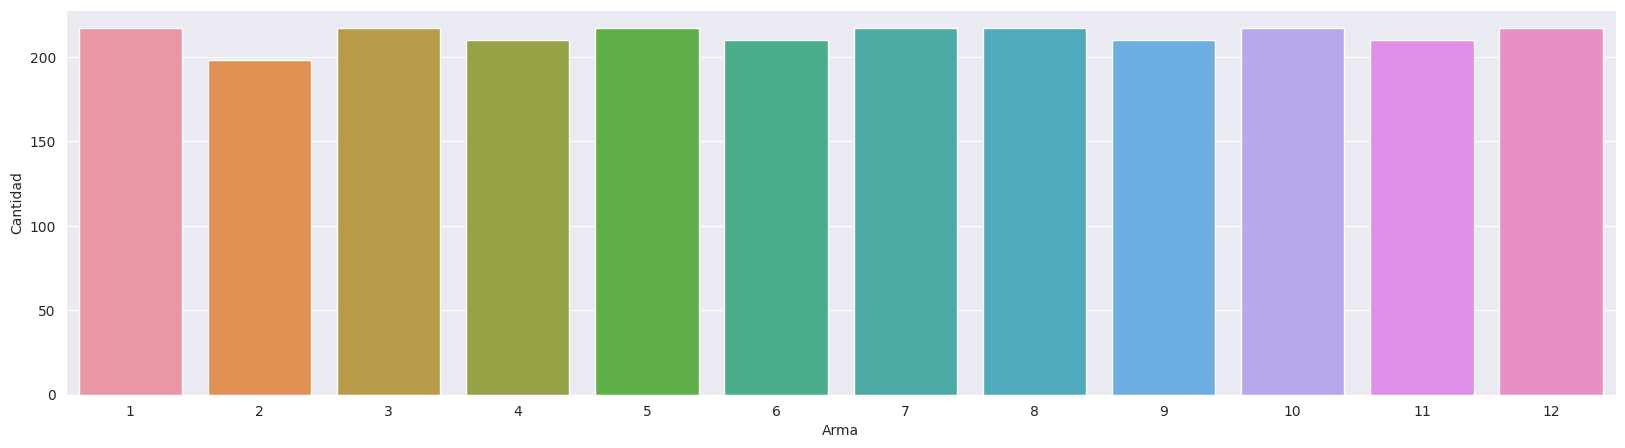

In [ ]:
#@title Cantidad de homicidios con diferentes armas
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
sns.countplot(x = dataset["number_month"],)
plt.xlabel('Arma')
plt.ylabel('Cantidad')

In [ ]:
meses = dataset["number_month"].unique()
meses

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
print(dataset["homicides"].unique())

[2 0 1 3 7 4 6 5]


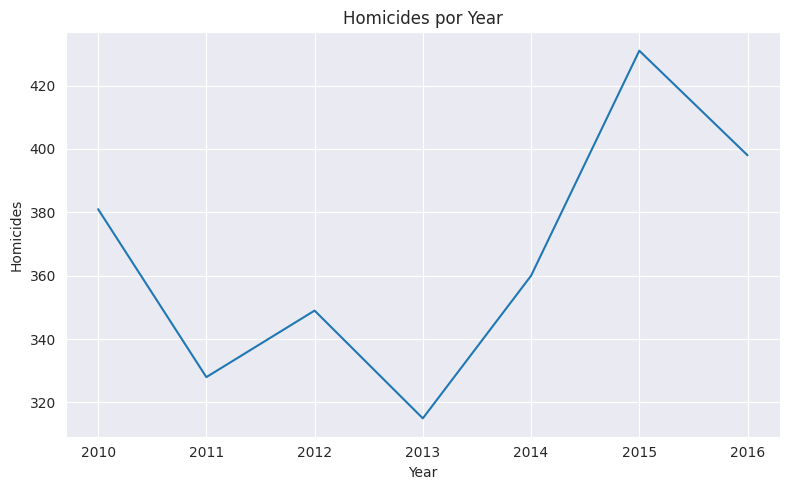

In [ ]:
#@title Grafica de homicidios por año
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV a un dataframe
df = pd.read_csv("/content/drive/MyDrive/database1.csv")

# Eliminar valores duplicados y faltantes del dataframe
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Crear un pivot table para contar los homicidios por año
pvt = pd.pivot_table(df, index=['year'], values=['homicides'], aggfunc=np.sum)

# Crear el gráfico
plt.figure(figsize=(8,5), tight_layout=True)
plt.plot(pvt)
plt.xlabel("Year")
plt.ylabel('Homicides')
plt.title("Homicides por Year")
plt.show()

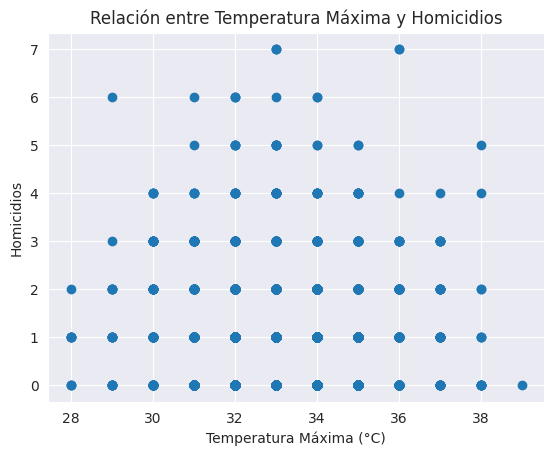

Coeficiente de correlación de Pearson: -5.406905496852994e-05


In [ ]:
#@title Grafica Relación entre Temperatura Máxima y Homicidios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv("/content/drive/MyDrive/database1.csv")

# Crear un gráfico de dispersión
plt.scatter(df['maxtemp'], df["homicides"])
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Homicidios')
plt.title('Relación entre Temperatura Máxima y Homicidios')
plt.show()

# Calcular el coeficiente de correlación de Pearson
corr = np.corrcoef(df['maxtemp'], df['homicides'])[0, 1]
print("Coeficiente de correlación de Pearson:", corr)


#**Metodos de clasificacion**

In [ ]:
#@title Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *

In [ ]:
#@title Mostrar el dataset
dataset=pd.read_csv("/content/drive/MyDrive/database1.csv")
dataset.head(5)

date  year    month  number_month       day  number_day  \
0  01/01/2010  2010  January             1    Friday           1   
1  01/02/2010  2010  January             1  Saturday           2   
2  01/03/2010  2010  January             1    Sunday           3   
3  01/04/2010  2010  January             1    Monday           4   
4  01/05/2010  2010  January             1   Tuesday           5   

   interpersviolence  homicides  maxtemp  humid  precipitations  windspeed  \
0                 31          2       33     78             0.0       15.4   
1                  6          0       32     82             0.0       16.5   
2                  8          1       32     76             0.0       14.8   
3                  7          0       34     81             0.0       10.7   
4                  3          2       35     83             0.0       13.5   

   moonlight  holidays  weekends  fines  vehicles  heatindex  
0      1.000         1         0      2         0    26.2516  
1      0.987         0         1     13         0    30.4034  
2      0.944         0         1     11         0    29.7769  
3      0.876         0         0      0        13    30.0638  
4      0.787         0         0      0         1    30.0271

In [ ]:
#@title Eliminar algunas columnas (no necesarias) y hacer la partición del dataset
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

p = pd.read_csv("/content/drive/MyDrive/database1.csv")
p.drop(['date','month',"day"], axis=1,inplace=True)
print(p.shape)
X1 = p.values[:,[0,1,2,3,5,6,7,8,9,10,11,12,13,14]]
y1 = p.values[:,[4]]
y1=y1.astype('int')
print(X1.shape, y1.shape)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1.ravel(), test_size=0.2, random_state=21)

(2557, 15)
(2557, 14) (2557, 1)


In [ ]:
#@title Mostrar el dataset modificado
p.head(5)

year  number_month  number_day  interpersviolence  homicides  maxtemp  \
0  2010             1           1                 31          2       33   
1  2010             1           2                  6          0       32   
2  2010             1           3                  8          1       32   
3  2010             1           4                  7          0       34   
4  2010             1           5                  3          2       35   

   humid  precipitations  windspeed  moonlight  holidays  weekends  fines  \
0     78             0.0       15.4      1.000         1         0      2   
1     82             0.0       16.5      0.987         0         1     13   
2     76             0.0       14.8      0.944         0         1     11   
3     81             0.0       10.7      0.876         0         0      0   
4     83             0.0       13.5      0.787         0         0      0   

   vehicles  heatindex  
0         0    26.2516  
1         0    30.4034  
2         0    29.7769  
3        13    30.0638  
4         1    30.0271

In [ ]:
#@title Matriz
#sns.pairplot(p, hue="homicides", diag_kind="hist");# kind="kde"

In [ ]:
#@title The Naive Gaussian Bayes
est = GaussianNB()
est.fit(X_train1,y_train1)
print(accuracy_score(est.predict(X_test1), y_test1))

0.36328125


In [ ]:
#@title Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

est = DecisionTreeClassifier(max_depth=1,random_state=21) #Tunnig de parametros: max dept, criterion
est.fit(X_train1,y_train1)
print(accuracy_score(est.predict(X_test1), y_test1))

0.447265625


# Clasificación (escogida).

In [ ]:
#@title Eliminar algunas columnas (no necesarias) y hacer la partición del dataset
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

d = pd.read_csv("/content/drive/MyDrive/database1.csv")
d.drop(['date','month',"day","holidays","weekends"], axis=1,inplace=True)
print(d.shape)
X = d.values[:,[0,1,2,3,5,6,7,8,9,10,11,12]]
y = d.values[:,[4]]
y=y.astype('int')
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, random_state=21)

(2557, 13)
(2557, 12) (2557, 1)


In [ ]:
#@title Mostrar el dataset
d.head(5)

year  number_month  number_day  interpersviolence  homicides  maxtemp  \
0  2010             1           1                 31          2       33   
1  2010             1           2                  6          0       32   
2  2010             1           3                  8          1       32   
3  2010             1           4                  7          0       34   
4  2010             1           5                  3          2       35   

   humid  precipitations  windspeed  moonlight  fines  vehicles  heatindex  
0     78             0.0       15.4      1.000      2         0    26.2516  
1     82             0.0       16.5      0.987     13         0    30.4034  
2     76             0.0       14.8      0.944     11         0    29.7769  
3     81             0.0       10.7      0.876      0        13    30.0638  
4     83             0.0       13.5      0.787      0         1    30.0271

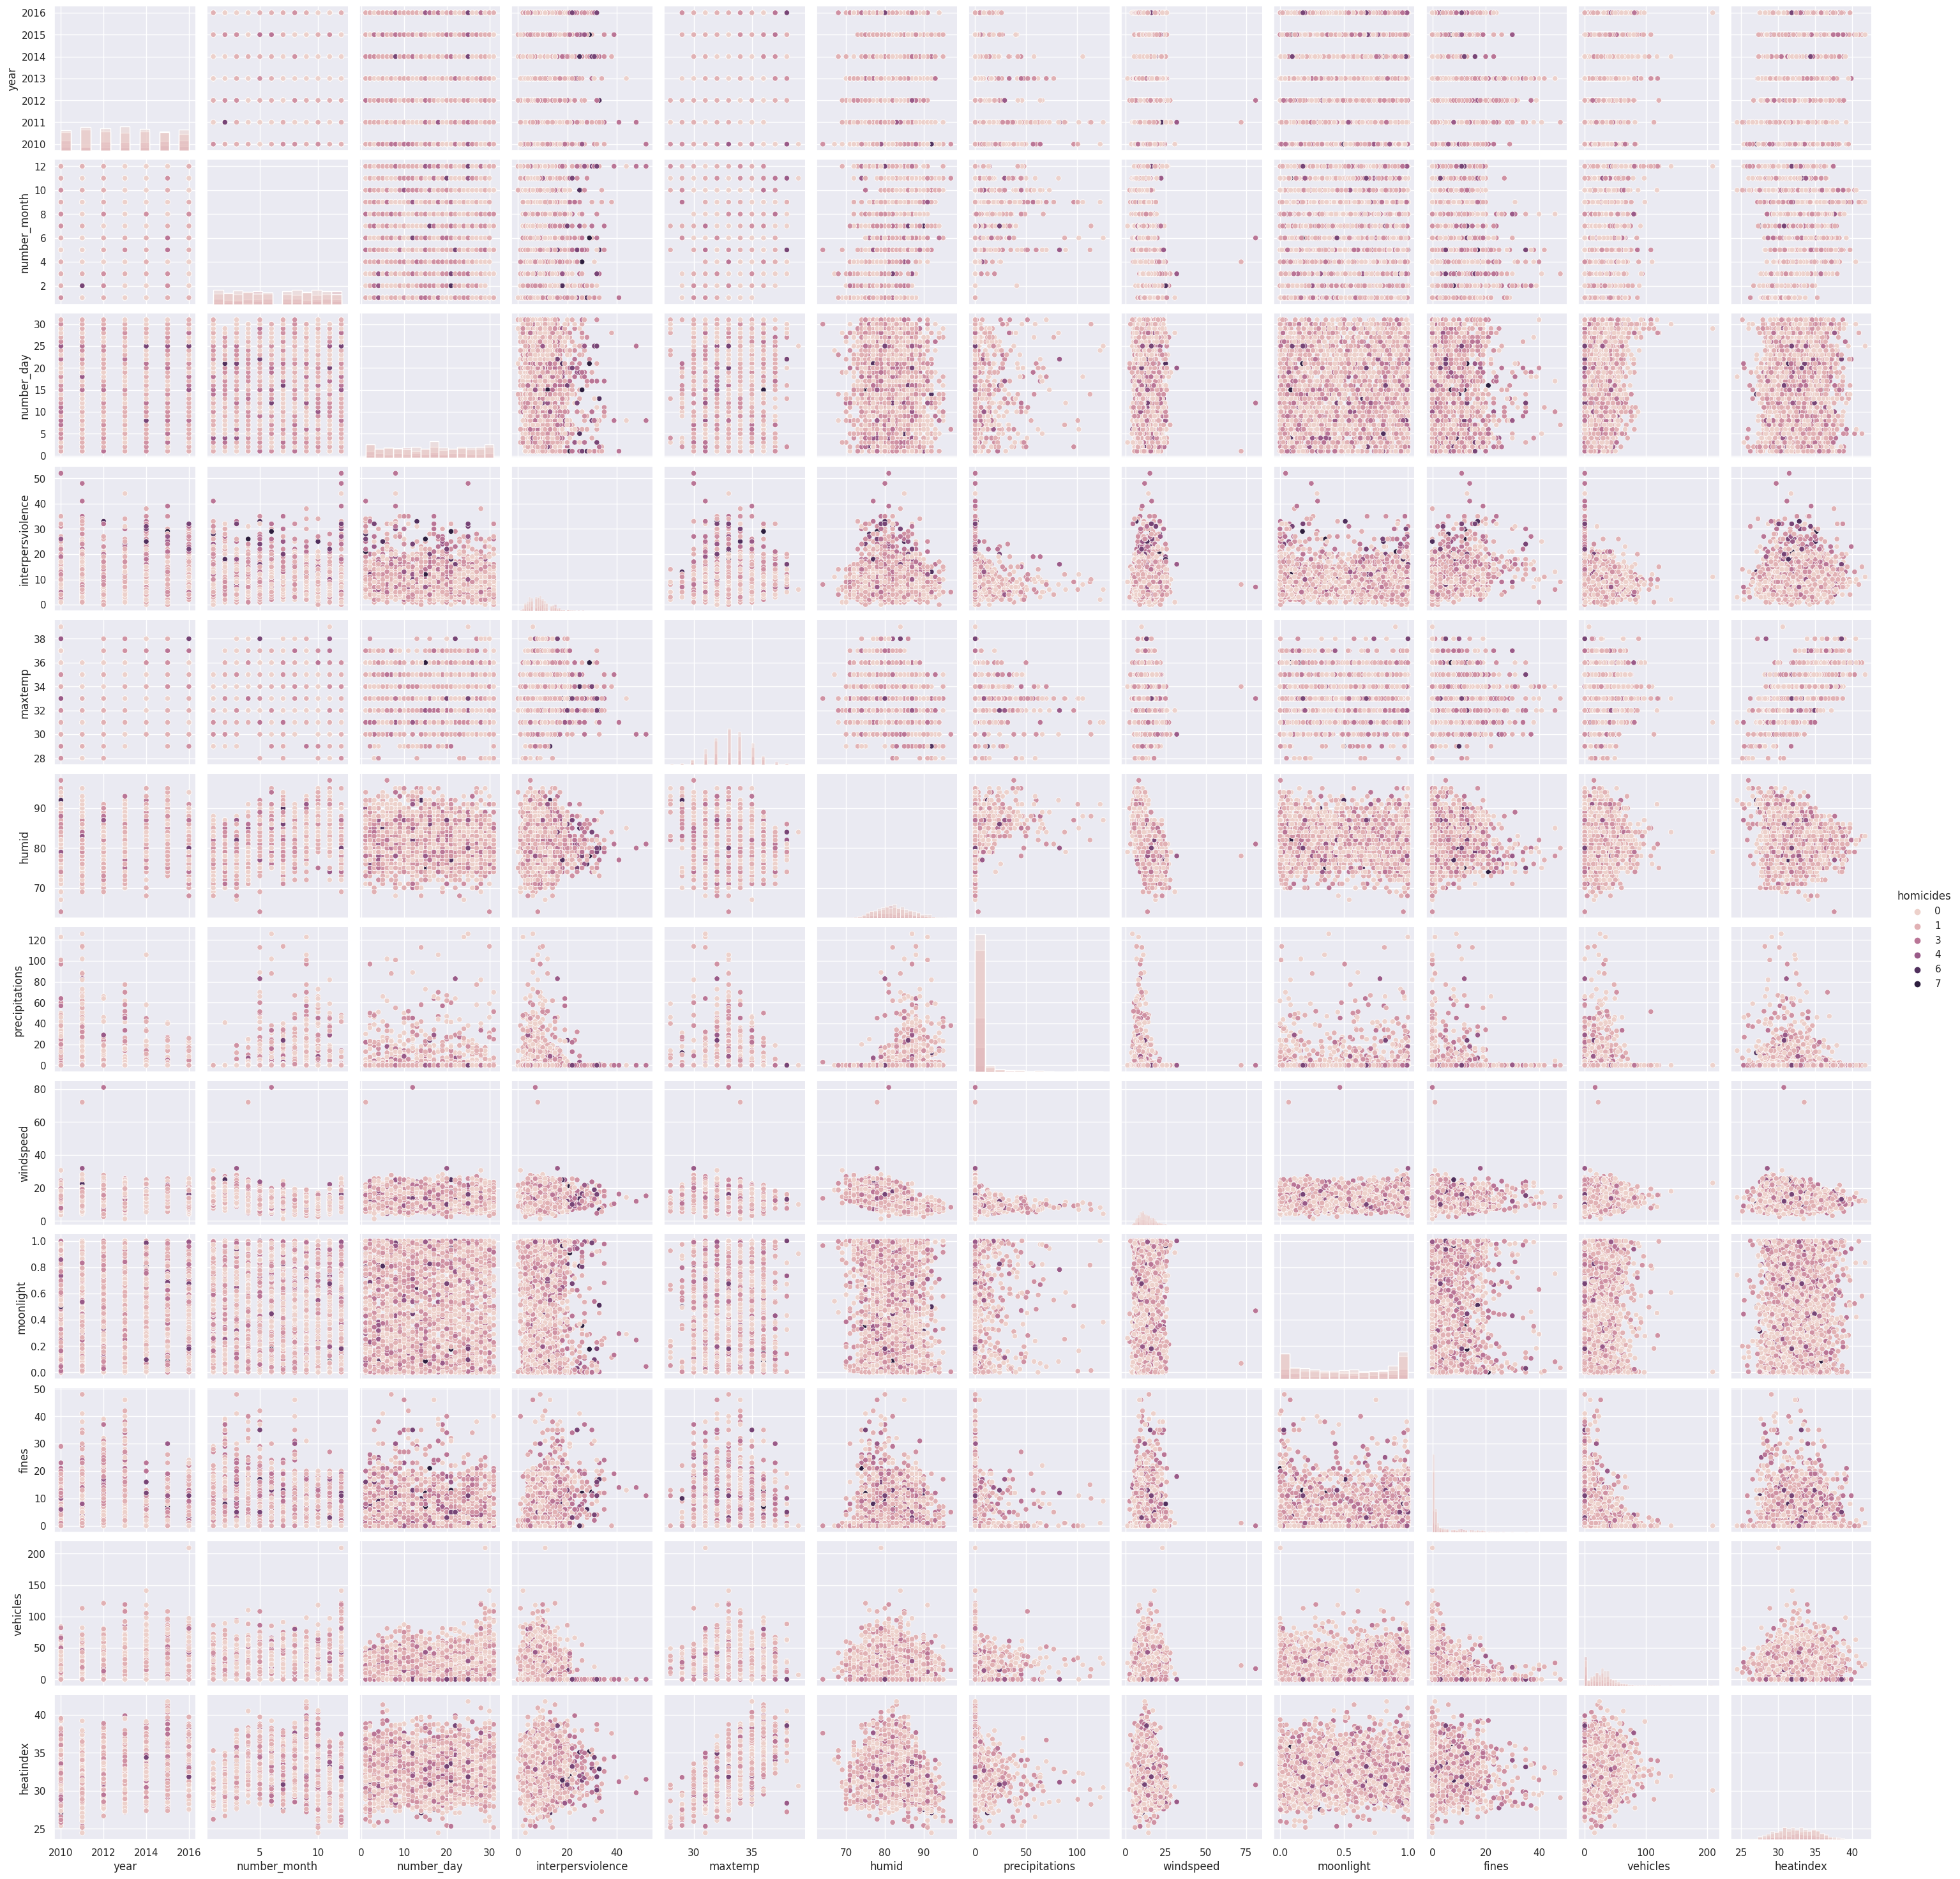

In [ ]:
#@title Matriz
sns.pairplot(d, hue="homicides", diag_kind="hist");# kind="kde"

In [ ]:
#@title The Naive Gaussian Bayes
est = GaussianNB()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.375


In [ ]:
#@title Cross Validation
from sklearn.model_selection import cross_val_score
s = cross_val_score(est, X, y.ravel(), cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.30859375 0.27148438 0.32289628 0.33463796 0.37181996]
accuracy 0.322 (+/- 0.03278)


#1. Decision Tree classifier

In [ ]:
#@title Tunnig de parametros (Max_depth)
def show_curve_d1(est):
    means, stds = [], [] # Listas para almacenar las medias y desviaciones estándar de las precisiones
    max_depth_range = range(1,11,1) # Rango de valores para el parámetro max_depth
    # Iteramos sobre los valores de max_depth
    for max_depth_c in max_depth_range:
        #print (max_depth,)
        est = DecisionTreeClassifier(max_depth=max_depth_c,random_state=21)# Creamos una instancia del clasificador con el valor actual de max_depth
        est.fit(X_train,y_train)
        s=accuracy_score(est.predict(X_test), y_test)
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_depth_range, means, label="mean", color="black")
    # Rellenamos el área entre las curvas de mean-std y mean+std para visualizar la variabilidad de las precisiones
    plt.fill_between(max_depth_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("max depth")
    plt.ylabel("accuracy")
    plt.legend()

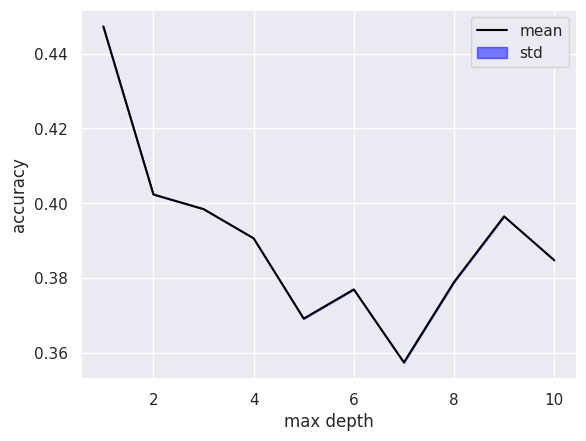

In [ ]:
#@title Grafica
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

show_curve_d1(DecisionTreeClassifier())

In [ ]:
#@title Tunnig de parametros (max_depth)
def show_curve_d(est):
    means, stds = [], []
    max_depth_range = range(1,36,5)
    for max_depth_c in max_depth_range:
        #print (max_depth,)
        est = DecisionTreeClassifier(max_depth=max_depth_c,random_state=21)
        est.fit(X_train,y_train)
        s=accuracy_score(est.predict(X_test), y_test)
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_depth_range, means, label="mean", color="black")
    plt.fill_between(max_depth_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("max depth")
    plt.ylabel("accuracy")
    plt.legend()

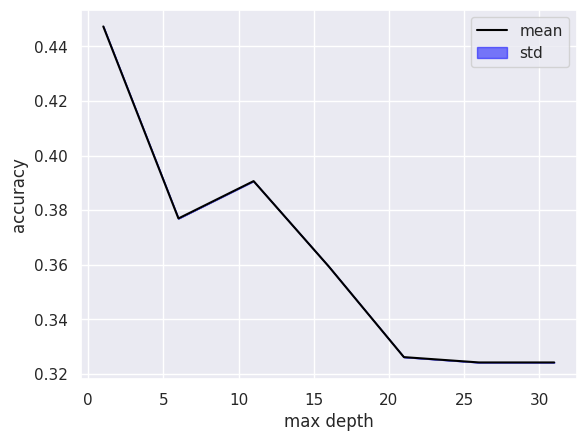

In [ ]:
#@title Grafica
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

show_curve_d(DecisionTreeClassifier())

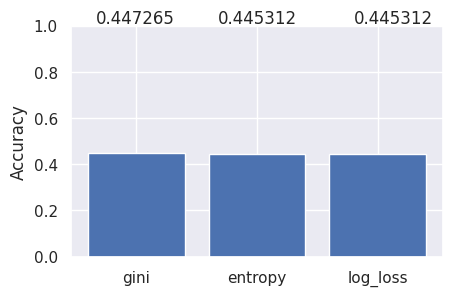

In [ ]:
#@title Tunnig de parametros (criterion)
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def criterion1(X, y):

    # Estimadores con sus respectivos hiperparámetros
    est1 = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=21)
    est2 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=21)
    est3 = DecisionTreeClassifier(criterion='log_loss', max_depth=1, random_state=21)

    # Entrenar los estimadores
    est1.fit(X_train, y_train)
    est2.fit(X_train, y_train)
    est3.fit(X_train, y_train)


    # Calcular la exactitud en el conjunto de validación
    score1 = accuracy_score(est1.predict(X_test), y_test)
    score2 = accuracy_score(est2.predict(X_test), y_test)
    score3 = accuracy_score(est3.predict(X_test), y_test)

    return score1, score2, score3

X, y = load_iris(return_X_y=True)

score1, score2, score3 = criterion1(X, y)

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.bar([0,1,2], [score1,score2,score3], capsize=10)
ax1.set_xticks(range(0,3))
ax1.set_xticklabels(('gini', 'entropy', 'log_loss'))
ax1.set_ylabel('Accuracy')
ax1.text(-0.33, 1.01, str(score1)[:8])
ax1.text(0.68, 1.01, str(score2)[:8])
ax1.text(1.8, 1.01, str(score3)[:8])
ax1.axis(ymin=0, ymax=1)  # Ajuste del rango del eje y
plt.show()




In [ ]:
#@title 1. Decision Tree classifier (escogida)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Creamos una instancia del clasificador de árbol de decisión
est = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=21)
# Ajustamos el clasificador utilizando los datos de entrenamiento
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.447265625


#2. Random Forest classifier

In [ ]:
#@title Tunnig de parametros (max_depth)
def show_curve_r(est):
    means, stds = [], []
    max_depth_range = range(1,11,1)
    for max_depth_c in max_depth_range:
        #print (max_depth,)
        est = RandomForestClassifier(max_depth=max_depth_c,random_state=21)
        est.fit(X_train,y_train)
        s=accuracy_score(est.predict(X_test), y_test)
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_depth_range, means, label="mean", color="black")
    plt.fill_between(max_depth_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("max depth")
    plt.ylabel("accuracy")
    plt.legend()

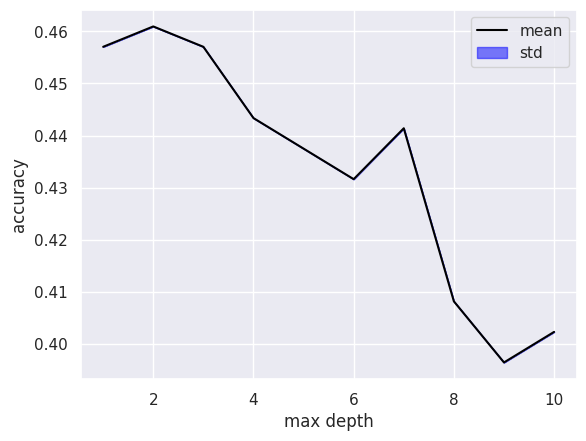

In [ ]:
#@title Grafica
from sklearn.ensemble import RandomForestClassifier
show_curve_r(RandomForestClassifier())

In [ ]:
#@title Tunnig de parametros (max_depth)
def show_curve_r_1(est):
    means, stds = [], []
    max_depth_range = range(1,50,5)
    for max_depth_c in max_depth_range:
        #print (max_depth,)
        est = RandomForestClassifier(max_depth=max_depth_c,random_state=21)
        est.fit(X_train,y_train)
        s=accuracy_score(est.predict(X_test), y_test)
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_depth_range, means, label="mean", color="black")
    plt.fill_between(max_depth_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("max depth")
    plt.ylabel("accuracy")
    plt.legend()

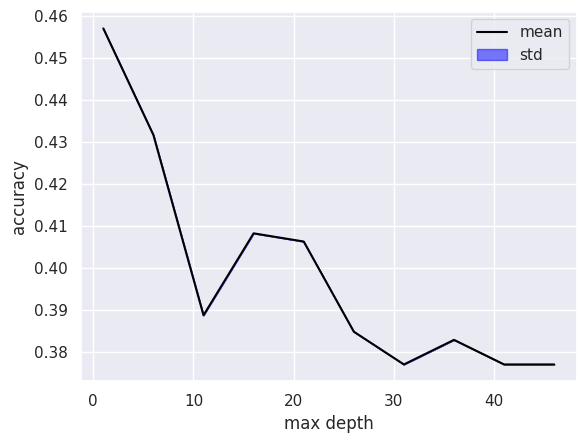

In [ ]:
#@title Grafica
from sklearn.ensemble import RandomForestClassifier
show_curve_r_1(RandomForestClassifier())

In [ ]:
#@title Tunnig de parametros (n_estimators)
def show_curve_r_n(est):
    means, stds = [], []
    n_estimators_range = range(1,101,1)
    for n_estimators_r in n_estimators_range:
        #print (n_estimators,)
        est = RandomForestClassifier(n_estimators=n_estimators_r,max_depth=2,random_state=21)
        est.fit(X_train,y_train)
        s=accuracy_score(est.predict(X_test), y_test)
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(n_estimators_range, means, label="mean", color="black")
    plt.fill_between(n_estimators_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n estimators")
    plt.ylabel("accuracy")
    plt.legend()

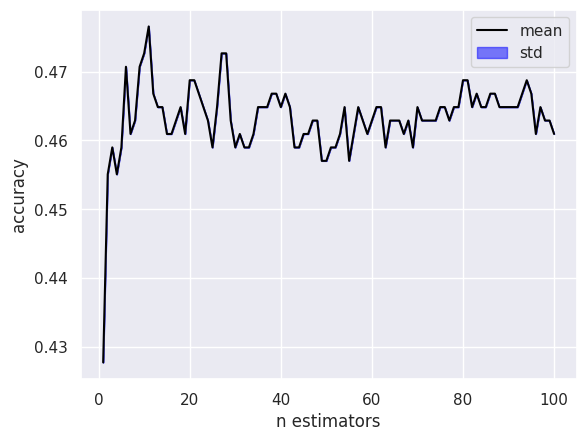

In [ ]:
#@title Grafica
from sklearn.ensemble import RandomForestClassifier
show_curve_r_n(RandomForestClassifier())

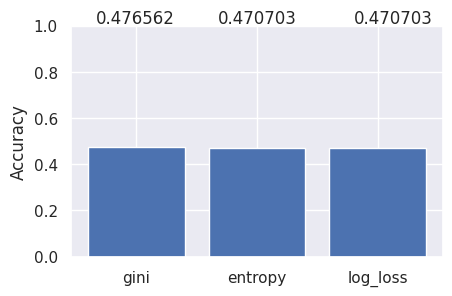

In [ ]:
#@title Tunnig de parametros (criterion)
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def criterion(X, y):

    # Estimadores con sus respectivos hiperparámetros
    est1 = RandomForestClassifier(criterion="gini", n_estimators=11,max_depth=2,random_state=21)
    est2 = RandomForestClassifier(criterion="entropy", n_estimators=11,max_depth=2,random_state=21)
    est3 = RandomForestClassifier(criterion="log_loss", n_estimators=11,max_depth=2,random_state=21)

    # Entrenar los estimadores
    est1.fit(X_train, y_train)
    est2.fit(X_train, y_train)
    est3.fit(X_train, y_train)


    # Calcular la exactitud en el conjunto de validación
    score1 = accuracy_score(est1.predict(X_test), y_test)
    score2 = accuracy_score(est2.predict(X_test), y_test)
    score3 = accuracy_score(est3.predict(X_test), y_test)

    return score1, score2, score3

X, y = load_iris(return_X_y=True)

score1, score2, score3 = criterion(X, y)

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.bar([0,1,2], [score1,score2,score3], capsize=10)
ax1.set_xticks(range(0,3))
ax1.set_xticklabels(('gini', 'entropy', 'log_loss'))
ax1.set_ylabel('Accuracy')
ax1.text(-0.33, 1.01, str(score1)[:8])
ax1.text(0.68, 1.01, str(score2)[:8])
ax1.text(1.8, 1.01, str(score3)[:8])
ax1.axis(ymin=0, ymax=1)  # Ajuste del rango del eje y
plt.show()

In [ ]:
#@title 2. Random Forest classifier (escogida)
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier(criterion="gini", n_estimators=11,max_depth=2,random_state=21)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.4765625


#3. Support vector machine (SVM)

##Linear

In [ ]:
#@title Tunnig de parametros (C)
def show_curve_svm(est):
    means, stds = [], [] # Listas para almacenar las medias y desviaciones estándar de las precisiones
    c_range = range(1,101,10) # Rango de valores para el parámetro C del SVM
    # Iteramos sobre los valores de C
    for c_svm in c_range:
        #print (c_svm,)
        est = SVC(kernel="linear",C=c_svm,random_state=21)
        est.fit(X_train,y_train)
        s=accuracy_score(est.predict(X_test), y_test)
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(c_range, means, label="mean", color="black")
    plt.fill_between(c_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("C")
    plt.ylabel("accuracy")
    plt.legend()

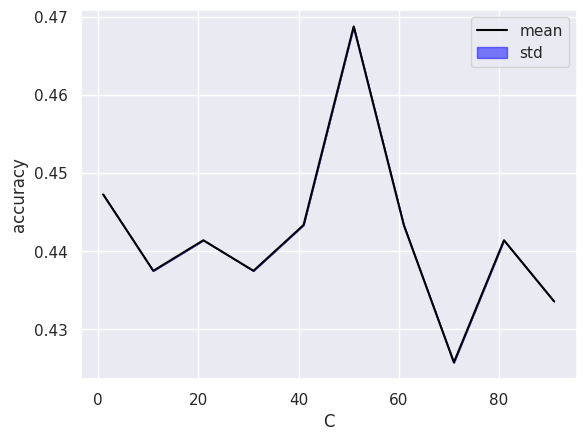

In [ ]:
#@ title Grafica
from sklearn.svm import SVC
show_curve_svm(SVC())

In [ ]:
#@title Accuracy
from sklearn.svm import SVC #c
est = SVC(kernel="linear",C=51,random_state=21)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.46875


##Poly

In [ ]:
#@title Tunnig de parametros (degree)
def show_curve_s_p(est):
    means, stds = [], []
    degree_range = range(1,11,1)
    for degree_s in degree_range:
        #print (degree)
        est = SVC(kernel="poly",degree=degree_s,random_state=21)
        est.fit(X_train,y_train)
        s=accuracy_score(est.predict(X_test), y_test)
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(degree_range, means, label="mean", color="black")
    plt.fill_between(degree_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("degree")
    plt.ylabel("accuracy")
    plt.legend()

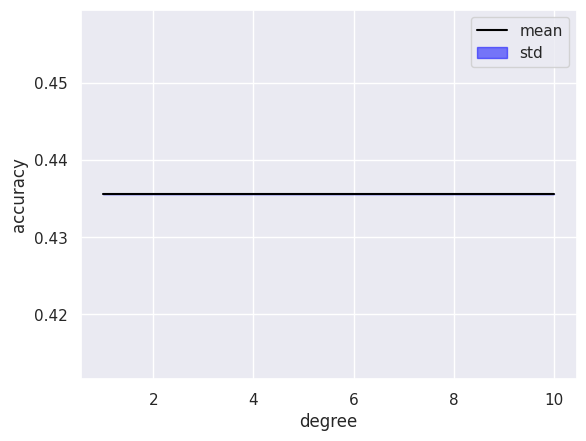

In [ ]:
#@title Grafica
from sklearn.svm import SVC
show_curve_s_p(SVC())

In [ ]:
#@title Grafica
from sklearn.svm import SVC # c
est = SVC(kernel="poly",degree=10,C=51,random_state=21)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.451171875


##Rbf

In [ ]:
#@title Tunnig de parametros (gamma)
def show_curve_svm_g(est):
    means, stds = [], []
    gamma_range = range(1,11,1)
    for gamma_svm in gamma_range:
        #print (gamma)
        est = SVC(kernel="rbf", gamma=gamma_svm, random_state=21)
        est.fit(X_train,y_train)
        s=accuracy_score(est.predict(X_test), y_test)
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(gamma_range, means, label="mean", color="black")
    plt.fill_between(gamma_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("gamma")
    plt.ylabel("accuracy")
    plt.legend()

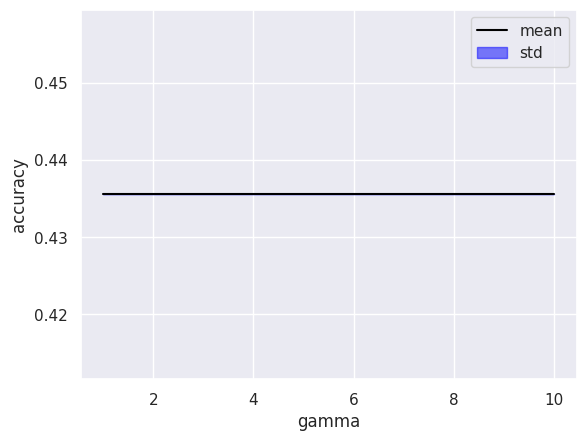

In [ ]:
#@title Grafica
from sklearn.svm import SVC
show_curve_svm_g(SVC())

In [ ]:
#@title Accuracy
from sklearn.svm import SVC #c
est = SVC(kernel= "rbf",C=51,gamma=2,random_state=21)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.435546875


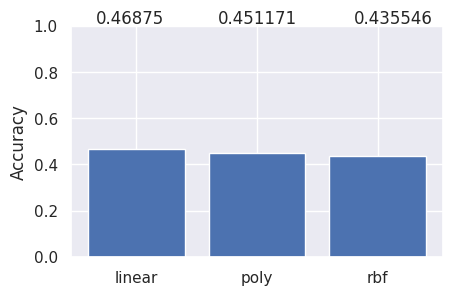

In [ ]:
#@title Tunnig de parametros (kernel)
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def kernel(X, y):

    # Estimadores con sus respectivos hiperparámetros
    est1 = SVC(kernel="linear",C=51,random_state=21)
    est2 = SVC(kernel="poly",degree=10,C=51,random_state=21)
    est3 = SVC(kernel= "rbf",C=51,gamma=2,random_state=21)

    # Entrenar los estimadores
    est1.fit(X_train, y_train)
    est2.fit(X_train, y_train)
    est3.fit(X_train, y_train)


    # Calcular la exactitud en el conjunto de validación
    score1 = accuracy_score(est1.predict(X_test), y_test)
    score2 = accuracy_score(est2.predict(X_test), y_test)
    score3 = accuracy_score(est3.predict(X_test), y_test)

    return score1, score2, score3

X, y = load_iris(return_X_y=True)

score1, score2, score3 = kernel(X, y)

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.bar([0,1,2], [score1,score2,score3], capsize=10)
ax1.set_xticks(range(0,3))
ax1.set_xticklabels(('linear', 'poly', 'rbf'))
ax1.set_ylabel('Accuracy')
ax1.text(-0.33, 1.01, str(score1)[:8])
ax1.text(0.68, 1.01, str(score2)[:8])
ax1.text(1.8, 1.01, str(score3)[:8])
ax1.axis(ymin=0, ymax=1)  # Ajuste del rango del eje y
plt.show()

In [ ]:
#@title Support vector machine (SVM) (escogida)
from sklearn.svm import SVC #c
est = SVC(kernel="linear",C=51,random_state=21)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.46875


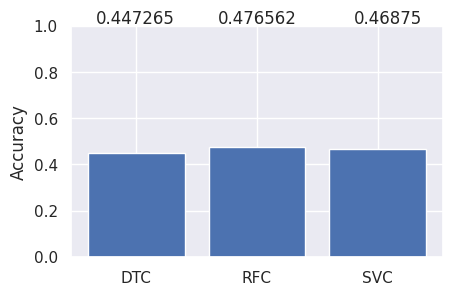

In [ ]:
#@title Comparacion de metodos para escoger el mejor
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def mejor(X, y):

    # Estimadores con sus respectivos hiperparámetros
    est1 = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=21)
    est2 = RandomForestClassifier(criterion="gini", n_estimators=11,max_depth=2,random_state=21)
    est3 = SVC(kernel="linear",C=51,random_state=21)

    # Entrenar los estimadores
    est1.fit(X_train, y_train)
    est2.fit(X_train, y_train)
    est3.fit(X_train, y_train)


    # Calcular la exactitud en el conjunto de validación
    score1 = accuracy_score(est1.predict(X_test), y_test)
    score2 = accuracy_score(est2.predict(X_test), y_test)
    score3 = accuracy_score(est3.predict(X_test), y_test)

    return score1, score2, score3

X, y = load_iris(return_X_y=True)

score1, score2, score3 = mejor(X, y)

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.bar([0,1,2], [score1,score2,score3], capsize=10)
ax1.set_xticks(range(0,3))
ax1.set_xticklabels(('DTC', 'RFC', 'SVC'))
ax1.set_ylabel('Accuracy')
ax1.text(-0.33, 1.01, str(score1)[:8])
ax1.text(0.68, 1.01, str(score2)[:8])
ax1.text(1.8, 1.01, str(score3)[:8])
ax1.axis(ymin=0, ymax=1)  # Ajuste del rango del eje y
plt.show()

##El mejor metodo de clasificación es RandomForestClassifier.

#**Metodos de regresión**

In [ ]:
#@title Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.__version__
from sklearn.model_selection import KFold
from sklearn.metrics import *

In [ ]:
#@title Mostrar el dataset
d.head(5)

year  number_month  number_day  interpersviolence  homicides  maxtemp  \
0  2010             1           1                 31          2       33   
1  2010             1           2                  6          0       32   
2  2010             1           3                  8          1       32   
3  2010             1           4                  7          0       34   
4  2010             1           5                  3          2       35   

   humid  precipitations  windspeed  moonlight  fines  vehicles  heatindex  
0     78             0.0       15.4      1.000      2         0    26.2516  
1     82             0.0       16.5      0.987     13         0    30.4034  
2     76             0.0       14.8      0.944     11         0    29.7769  
3     81             0.0       10.7      0.876      0        13    30.0638  
4     83             0.0       13.5      0.787      0         1    30.0271

#1. Decision Tree Regressor

In [ ]:
#@title Tunnig de parametros (max_depth)
def show_curve_r_c(est):
    means, stds = [], []
    max_depth_range = range(2,10)
    for max_d in max_depth_range:
        #print (max_depth,)
        regressor = DecisionTreeRegressor(max_depth=max_d,random_state=21)
        regressor.fit(X_train, y_train)

        s = mean_squared_error(y_test, regressor.predict(X_test))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_depth_range, means, label="mean", color="black")
    plt.fill_between(max_depth_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("max_depth")
    plt.ylabel("performance")
    plt.legend()

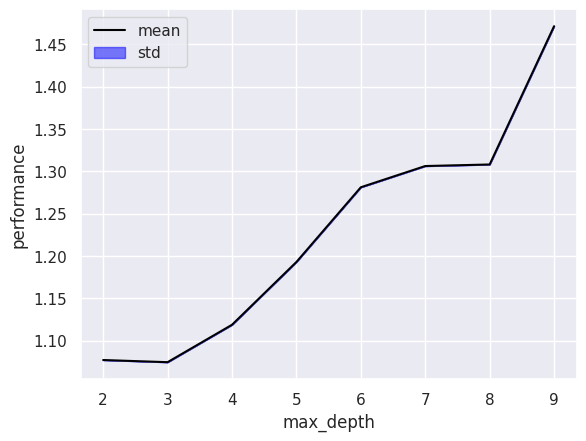

In [ ]:
#@title Grafica
from sklearn.tree import DecisionTreeRegressor
show_curve_r_c(DecisionTreeRegressor())

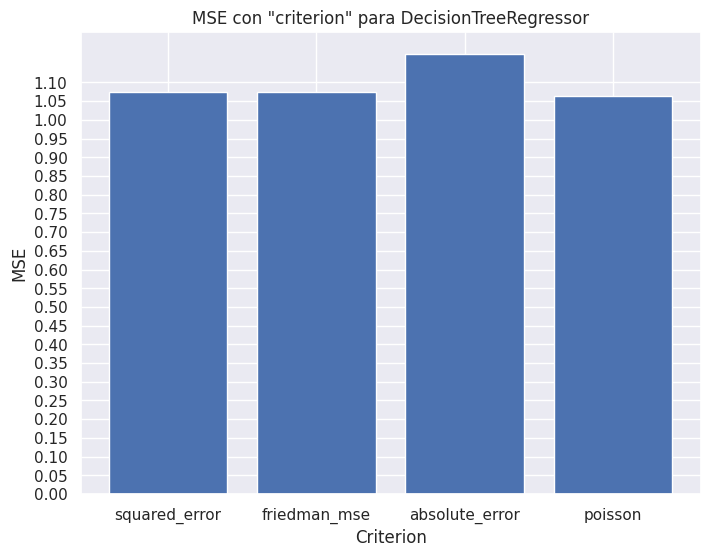

In [ ]:
#@title Tunnig de parametros para MSE (criterion)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mejor(X, y):
  # Define los posibles valores para el hiperparámetro "criterion"
  criterion_parametros = ["squared_error", "friedman_mse", "absolute_error","poisson"]

  mse_values = []

  # Realizamos el tuning de parámetros manualmente
  for criterion in criterion_parametros:
      # Creamos el modelo DecisionTreeRegressor con el valor de criterion actual
      regressor = DecisionTreeRegressor(criterion=criterion,max_depth=3, random_state=21)

      # Entrenamos el modelo en el conjunto de entrenamiento
      regressor.fit(X_train, y_train)

      # Calculamos el error cuadrático medio en el conjunto de validación
      mse = mean_squared_error(y_test, regressor.predict(X_test))
      mse_values.append(mse)


  return mse_values

X, y = load_iris(return_X_y=True)

mse_values = mejor(X, y)

f = plt.figure(figsize=(8, 6))
plt.bar(range(len(mse_values)), mse_values, tick_label=["squared_error", "friedman_mse", "absolute_error","poisson"], capsize=10)
plt.xlabel('Criterion')
plt.ylabel('MSE')
plt.title('MSE con "criterion" para DecisionTreeRegressor')
plt.yticks(np.arange(0, 1.15, 0.05))
plt.grid(True)
plt.show()

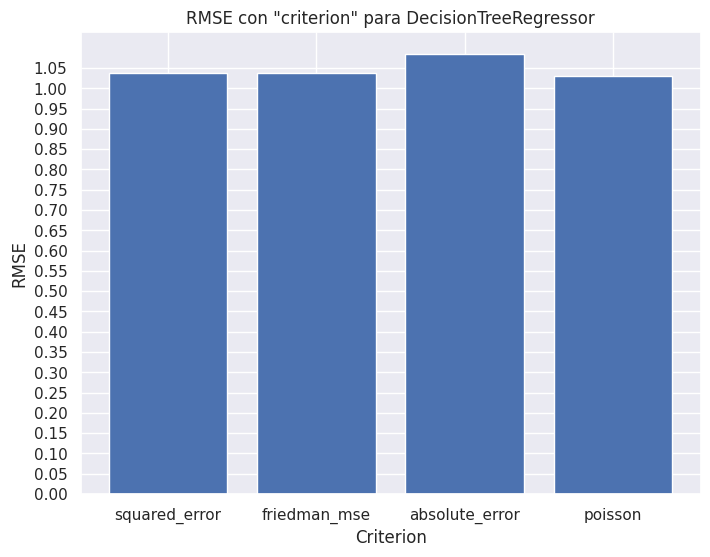

In [ ]:
#@title Tunnig de parametros para RMSE (criterion)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mejor(X, y):
  # Define los posibles valores para el hiperparámetro "criterion"
  criterion_parametros = ["squared_error", "friedman_mse", "absolute_error","poisson"]

  mse_values = []

  # Realizamos el tuning de parámetros manualmente
  for criterion in criterion_parametros:
      # Creamos el modelo DecisionTreeRegressor con el valor de criterion actual
      regressor = DecisionTreeRegressor(criterion=criterion,max_depth=3, random_state=21)

      # Entrenamos el modelo en el conjunto de entrenamiento
      regressor.fit(X_train, y_train)

      # Calculamos el error cuadrático medio en el conjunto de validación
      mse = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
      mse_values.append(mse)


  return mse_values

X, y = load_iris(return_X_y=True)

mse_values = mejor(X, y)

f = plt.figure(figsize=(8, 6))
plt.bar(range(len(mse_values)), mse_values, tick_label=["squared_error", "friedman_mse", "absolute_error","poisson"], capsize=10)
plt.xlabel('Criterion')
plt.ylabel('RMSE')
plt.title('RMSE con "criterion" para DecisionTreeRegressor')
plt.yticks(np.arange(0, 1.1, 0.05))
plt.grid(True)
plt.show()

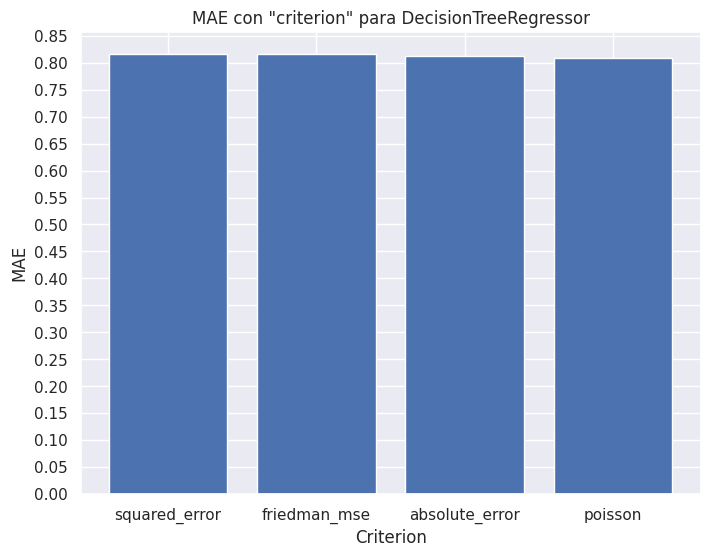

In [ ]:
#@title Tunnig de parametros para MAE (criterion)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mejor(X, y):
  # Define los posibles valores para el hiperparámetro "criterion"
  criterion_parametros = ["squared_error", "friedman_mse", "absolute_error","poisson"]

  mse_values = []

  # Realizamos el tuning de parámetros manualmente
  for criterion in criterion_parametros:
      # Creamos el modelo DecisionTreeRegressor con el valor de criterion actual
      regressor = DecisionTreeRegressor(criterion=criterion,max_depth=3, random_state=21)

      # Entrenamos el modelo en el conjunto de entrenamiento
      regressor.fit(X_train, y_train)

      # Calculamos el error cuadrático medio en el conjunto de validación
      mse = mean_absolute_error(y_test, regressor.predict(X_test))
      mse_values.append(mse)


  return mse_values

X, y = load_iris(return_X_y=True)

mse_values = mejor(X, y)

f = plt.figure(figsize=(8, 6))
plt.bar(range(len(mse_values)), mse_values, tick_label=["squared_error", "friedman_mse", "absolute_error","poisson"], capsize=10)
plt.xlabel('Criterion')
plt.ylabel('MAE')
plt.title('MAE con "criterion" para DecisionTreeRegressor')
plt.yticks(np.arange(0, 0.9, 0.05))
plt.grid(True)
plt.show()

In [ ]:
#@title Porcentajes de error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

regressor = DecisionTreeRegressor(criterion="poisson",max_depth=3,random_state=21)
regressor.fit(X_train, y_train)

mse_dt = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data:  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data:  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data (escogido):  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

MSE depth split data:  1.062
RMSE depth split data:  1.031
MAE depth split data (escogido):  0.809


#2. Random Forest Regressor

In [ ]:
#@title Tunnig de parametros (max_depth)
def show_curve_r_r1(est):
    means, stds = [], []
    max_depth_range = range(1,50,5)
    for max_depth_c in max_depth_range:
        #print (max_depth)
        regressor = RandomForestRegressor(max_depth=max_depth_c,random_state=21)
        regressor.fit(X_train, y_train)

        s = mean_squared_error(y_test, regressor.predict(X_test))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_depth_range, means, label="mean", color="black")
    plt.fill_between(max_depth_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("max depth")
    plt.ylabel("performance")
    plt.legend()

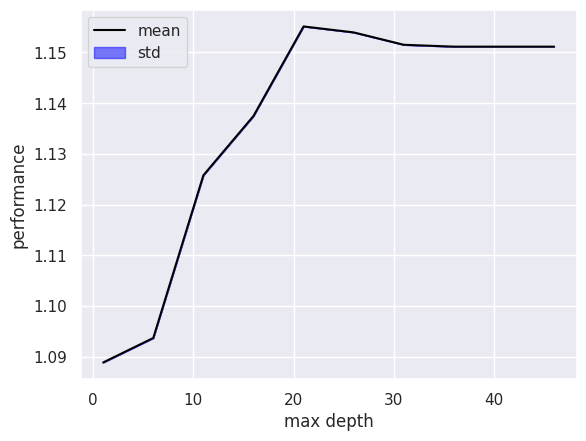

In [ ]:
#@title Grafica
from sklearn.model_selection import cross_val_score
show_curve_r_r1(DecisionTreeRegressor())

In [ ]:
#@title Tunnig de parametros (n_estimators)
def show_curve_r_n_r(est):
    means, stds = [], []
    n_estimators_range = range(1,101,1)
    for n_estimators_r in n_estimators_range:
        #print (n_estimators,)
        regressor = RandomForestRegressor(n_estimators=n_estimators_r,max_depth=2,random_state=21)
        regressor.fit(X_train, y_train)

        s = mean_squared_error(y_test, regressor.predict(X_test))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(n_estimators_range, means, label="mean", color="black")
    plt.fill_between(n_estimators_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n estimators")
    plt.ylabel("performance")
    plt.legend()

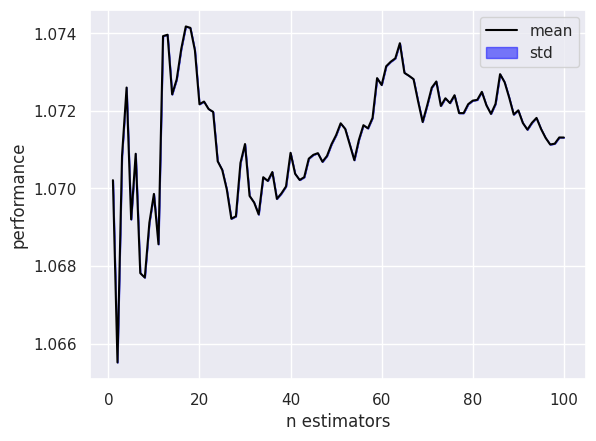

In [ ]:
#@title Grafica
from sklearn.ensemble import RandomForestRegressor
show_curve_r_n_r(RandomForestRegressor())

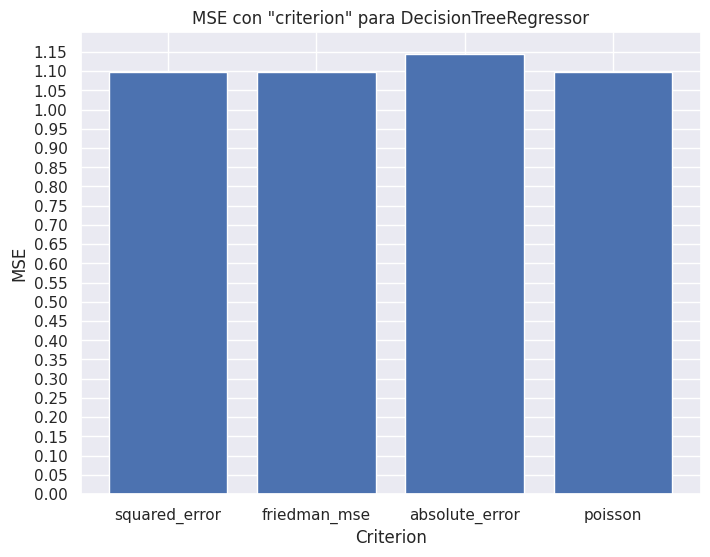

In [ ]:
#@title Tunnig de parametros para MSE (criterion)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mejor(X, y):
  # Define los posibles valores para el hiperparámetro "criterion"
  criterion_parametros = ["squared_error", "friedman_mse", "absolute_error","poisson"]

  mse_values = []

  # Realizamos el tuning de parámetros manualmente
  for criterion in criterion_parametros:
      # Creamos el modelo DecisionTreeRegressor con el valor de criterion actual
      regressor = RandomForestRegressor(criterion=criterion,max_depth=1,n_estimators=1,random_state=21)

      # Entrenamos el modelo en el conjunto de entrenamiento
      regressor.fit(X_train, y_train)

      # Calculamos el error cuadrático medio en el conjunto de validación
      mse = mean_squared_error(y_test, regressor.predict(X_test))
      mse_values.append(mse)


  return mse_values

X, y = load_iris(return_X_y=True)

mse_values = mejor(X, y)

f = plt.figure(figsize=(8, 6))
plt.bar(range(len(mse_values)), mse_values, tick_label=["squared_error", "friedman_mse", "absolute_error","poisson"], capsize=10)
plt.xlabel('Criterion')
plt.ylabel('MSE')
plt.title('MSE con "criterion" para DecisionTreeRegressor')
plt.yticks(np.arange(0, 1.2, 0.05))
plt.grid(True)
plt.show()

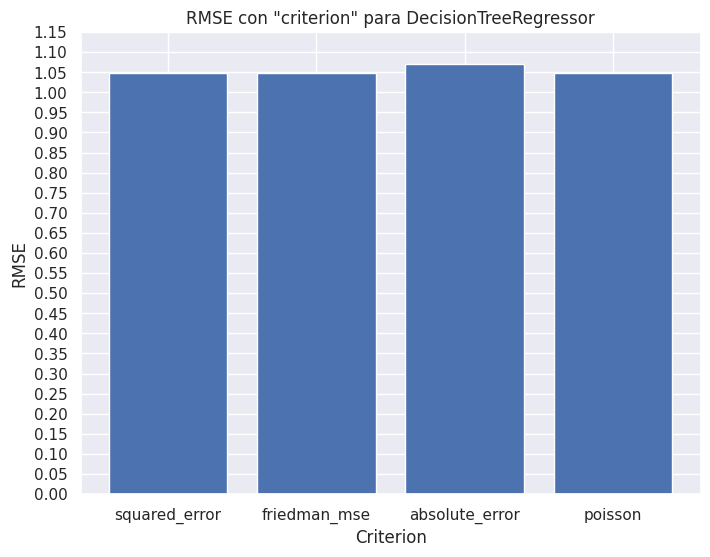

In [ ]:
#@title Tunnig de parametros para RMSE (criterion)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mejor(X, y):
  # Define los posibles valores para el hiperparámetro "criterion"
  criterion_parametros = ["squared_error", "friedman_mse", "absolute_error","poisson"]

  mse_values = []

  # Realizamos el tuning de parámetros manualmente
  for criterion in criterion_parametros:
      # Creamos el modelo DecisionTreeRegressor con el valor de criterion actual
      regressor = RandomForestRegressor(criterion=criterion,max_depth=1,n_estimators=1,random_state=21)

      # Entrenamos el modelo en el conjunto de entrenamiento
      regressor.fit(X_train, y_train)

      # Calculamos el error cuadrático medio en el conjunto de validación
      mse = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
      mse_values.append(mse)


  return mse_values

X, y = load_iris(return_X_y=True)

mse_values = mejor(X, y)

f = plt.figure(figsize=(8, 6))
plt.bar(range(len(mse_values)), mse_values, tick_label=["squared_error", "friedman_mse", "absolute_error","poisson"], capsize=10)
plt.xlabel('Criterion')
plt.ylabel('RMSE')
plt.title('RMSE con "criterion" para DecisionTreeRegressor')
plt.yticks(np.arange(0, 1.2, 0.05))
plt.grid(True)
plt.show()

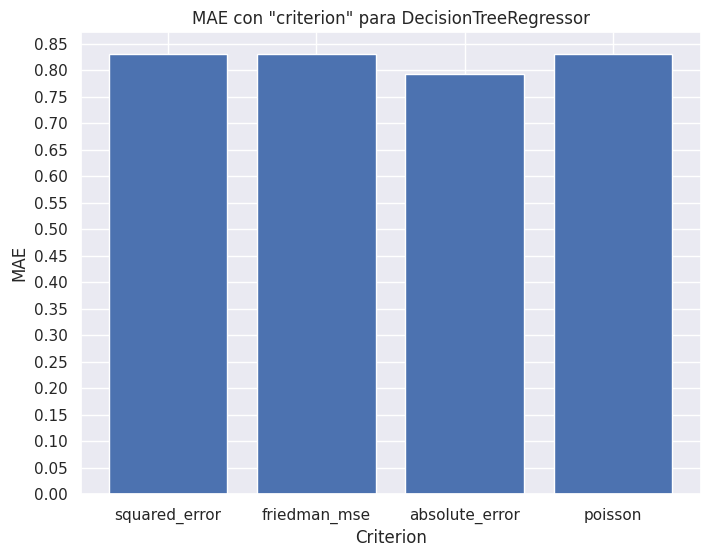

In [ ]:
#@title Tunnig de parametros para MAE (criterion)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

def mejor(X, y):
  # Define los posibles valores para el hiperparámetro "criterion"
  criterion_parametros = ["squared_error", "friedman_mse", "absolute_error","poisson"]

  mse_values = []

  # Realizamos el tuning de parámetros manualmente
  for criterion in criterion_parametros:
      # Creamos el modelo DecisionTreeRegressor con el valor de criterion actual
      regressor = RandomForestRegressor(criterion=criterion,max_depth=1,n_estimators=1,random_state=21)

      # Entrenamos el modelo en el conjunto de entrenamiento
      regressor.fit(X_train, y_train)

      # Calculamos el error cuadrático medio en el conjunto de validación
      mse = mean_absolute_error(y_test, regressor.predict(X_test))
      mse_values.append(mse)


  return mse_values

X, y = load_iris(return_X_y=True)

mse_values = mejor(X, y)

f = plt.figure(figsize=(8, 6))
plt.bar(range(len(mse_values)), mse_values, tick_label=["squared_error", "friedman_mse", "absolute_error","poisson"], capsize=10)
plt.xlabel('Criterion')
plt.ylabel('MAE')
plt.title('MAE con "criterion" para DecisionTreeRegressor')
plt.yticks(np.arange(0, 0.9, 0.05))
plt.grid(True)
plt.show()

In [ ]:
#@title Porcentajes de error
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(criterion="absolute_error",max_depth=1,n_estimators=1,random_state=21)
regressor.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data:  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data:  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data (escogida):  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

MSE depth split data:  1.145
RMSE depth split data:  1.070
MAE depth split data (escogida):  0.793


#3. Support vector regressor (SVR)

##Linear

In [ ]:
#@title Tunnig de parametros (C)
def show_curve_svr(est):
    means, stds = [], []
    c_range = range(2,101,10)
    for c_r in c_range:
        #print (C)
        regressor = SVR(kernel="linear", C=c_r)
        regressor.fit(X_train, y_train)
        s= mean_squared_error(y_test, regressor.predict(X_test))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(c_range, means, label="mean", color="black")
    plt.fill_between(c_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("C")
    plt.ylabel("performance")
    plt.legend()

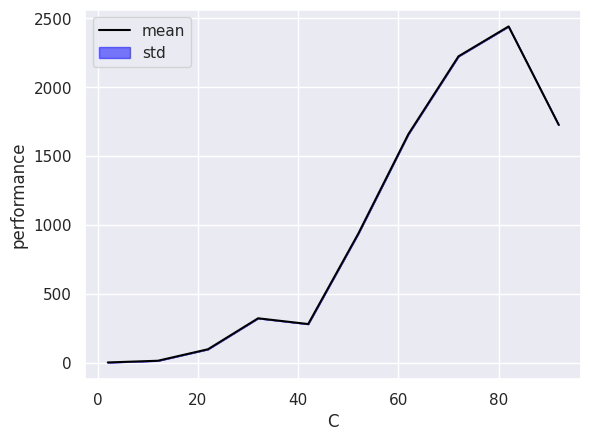

In [ ]:
#@title Grafica
from sklearn.svm import SVR
show_curve_svr(SVR())

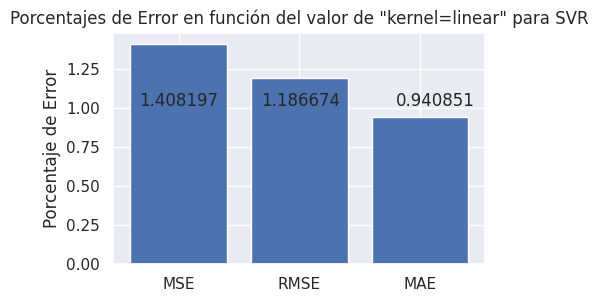

In [ ]:
#@title Tunnig de parametros para porcentajes de error (MSE,RMSE,MAE)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def mejor(X, y):

    # Estimador SVR
    est1 = SVR(kernel="linear", C=1)

    # Entrenar el estimador
    est1.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = est1.predict(X_test)

    # Calcular los porcentajes de error (MSE, RMSE, MAE)
    mse_score = mean_squared_error(y_test, y_pred)
    rmse_score = np.sqrt(mse_score)
    mae_score = mean_absolute_error(y_test, y_pred)

    return mse_score, rmse_score, mae_score

X, y = load_iris(return_X_y=True)

mse_score, rmse_score, mae_score = mejor(X, y)

f = plt.figure(figsize=(12, 3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.bar([0, 1, 2], [mse_score, rmse_score, mae_score], capsize=10)
ax1.set_xticks(range(0, 3))
ax1.set_xticklabels(('MSE', 'RMSE', 'MAE'))
plt.title('Porcentajes de Error en función del valor de "kernel=linear" para SVR')
ax1.set_ylabel('Porcentaje de Error')
ax1.text(-0.33, 1.01, str(mse_score)[:8])
ax1.text(0.68, 1.01, str(rmse_score)[:8])
ax1.text(1.8, 1.01, str(mae_score)[:8])
ax1.axis(ymin=0)
plt.show()


##Poly

In [ ]:
#@title Tunnig de parametros (degree)
def show_curve_svr_d(est):
    means, stds = [], []
    degree_range = range(2,101,10)
    for degree_r in degree_range:
        #print (degree)
        regressor = SVR(kernel="poly", degree=degree_r)
        regressor.fit(X_train, y_train)
        s= mean_squared_error(y_test, regressor.predict(X_test))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(degree_range, means, label="mean", color="black")
    plt.fill_between(degree_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("degree")
    plt.ylabel("performance")
    plt.legend()

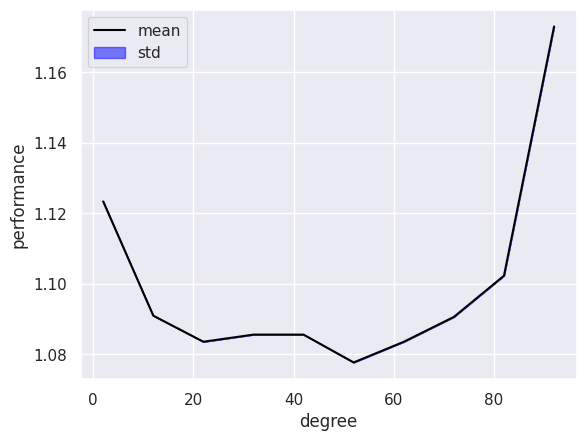

In [ ]:
#@title Grafica
from sklearn.svm import SVR
show_curve_svr_d(SVR())

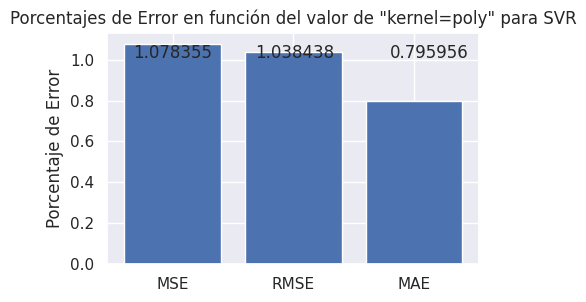

In [ ]:
#@title Tunnig de parametros para porcentajes de error (MSE,RMSE,MAE)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def mejor(X, y):

    # Estimador SVR
    est1 = SVR(kernel="poly", degree=51, C=1)

    # Entrenar el estimador
    est1.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = est1.predict(X_test)

    # Calcular los porcentajes de error (MSE, RMSE, MAE)
    mse_score = mean_squared_error(y_test, y_pred)
    rmse_score = np.sqrt(mse_score)
    mae_score = mean_absolute_error(y_test, y_pred)

    return mse_score, rmse_score, mae_score

X, y = load_iris(return_X_y=True)

mse_score, rmse_score, mae_score = mejor(X, y)

f = plt.figure(figsize=(12, 3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.bar([0, 1, 2], [mse_score, rmse_score, mae_score], capsize=10)
ax1.set_xticks(range(0, 3))
ax1.set_xticklabels(('MSE', 'RMSE', 'MAE'))
plt.title('Porcentajes de Error en función del valor de "kernel=poly" para SVR')
ax1.set_ylabel('Porcentaje de Error')
ax1.text(-0.33, 1.01, str(mse_score)[:8])
ax1.text(0.68, 1.01, str(rmse_score)[:8])
ax1.text(1.8, 1.01, str(mae_score)[:8])
ax1.axis(ymin=0)
plt.show()

##Rbf

In [ ]:
#@title Tunnig de parametros (gamma)
def show_curve_svr_g(est):
    means, stds = [], []
    gamma_range = range(2,36,5)
    for gamma_r in gamma_range:
        #print (gamma)
        regressor = SVR(kernel="rbf", gamma=gamma_r)
        regressor.fit(X_train, y_train)
        s= mean_squared_error(y_test, regressor.predict(X_test))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(gamma_range, means, label="mean", color="black")
    plt.fill_between(gamma_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("gamma")
    plt.ylabel("performance")
    plt.legend()

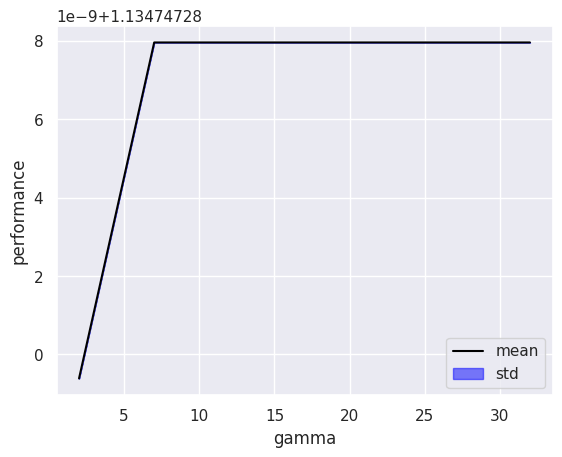

In [ ]:
#@title Grafica
from sklearn.svm import SVR
show_curve_svr_g(SVR())

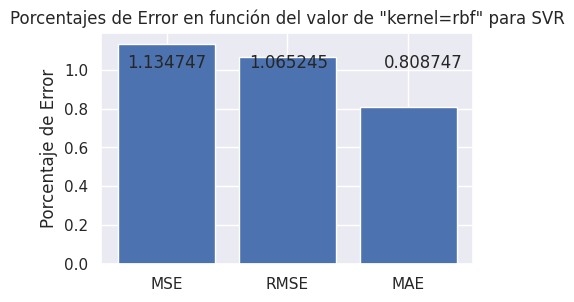

In [ ]:
#@title Tunnig de parametros para porcentajes de error (MSE,RMSE,MAE)
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

def mejor(X, y):

    # Estimador SVR
    est1 = SVR(kernel="rbf", gamma=2, C=1)

    # Entrenar el estimador
    est1.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = est1.predict(X_test)

    # Calcular los porcentajes de error (MSE, RMSE, MAE)
    mse_score = mean_squared_error(y_test, y_pred)
    rmse_score = np.sqrt(mse_score)
    mae_score = mean_absolute_error(y_test, y_pred)

    return mse_score, rmse_score, mae_score

X, y = load_iris(return_X_y=True)

mse_score, rmse_score, mae_score = mejor(X, y)

f = plt.figure(figsize=(12, 3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.bar([0, 1, 2], [mse_score, rmse_score, mae_score], capsize=10)
ax1.set_xticks(range(0, 3))
plt.title('Porcentajes de Error en función del valor de "kernel=rbf" para SVR')
ax1.set_xticklabels(('MSE', 'RMSE', 'MAE'))
ax1.set_ylabel('Porcentaje de Error')
ax1.text(-0.33, 1.01, str(mse_score)[:8])
ax1.text(0.68, 1.01, str(rmse_score)[:8])
ax1.text(1.8, 1.01, str(mae_score)[:8])
ax1.axis(ymin=0)
plt.show()

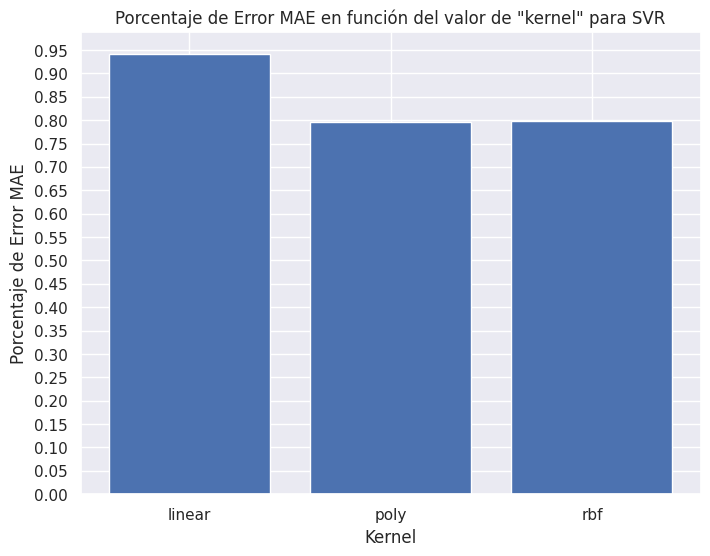

In [ ]:
#@title Tunnig de parametros para porcentaje de error (MAE) en el kernel
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def mejor(X, y):

    # Valores de kernel para probar
    kernel_parametros = ["linear", "poly", "rbf"]

    mae_scores = []

    for kernel_param in kernel_parametros:
        # Crear el modelo SVR con el valor de kernel_param actual
        svr_model = SVR(kernel=kernel_param)

        # Entrenar el modelo en el conjunto de entrenamiento
        svr_model.fit(X_train, y_train)

        # Realizar predicciones en el conjunto de prueba
        y_pred = svr_model.predict(X_test)

        # Calcular el porcentaje de error MAE en el conjunto de prueba
        mae = mean_absolute_error(y_test, y_pred)
        mae_scores.append(mae)

    return mae_scores

X, y = load_iris(return_X_y=True)

mae_scores = mejor(X, y)

f = plt.figure(figsize=(8, 6))
plt.bar(["linear", "poly", "rbf"], mae_scores, capsize=10)
plt.xlabel('Kernel')
plt.ylabel('Porcentaje de Error MAE')
plt.title('Porcentaje de Error MAE en función del valor de "kernel" para SVR')
plt.yticks(np.arange(0, 1, 0.05))
plt.grid(True)
plt.show()


In [ ]:
#@title Porcentajes de error
from sklearn.svm import SVR
regressor = SVR(kernel="poly",C=1,degree=51)
regressor.fit(X_train, y_train)

mse_rf = mean_squared_error(y_test, regressor.predict(X_test))
print("MSE depth split data:  %.3f"% mean_squared_error(y_test, regressor.predict(X_test)))
print("RMSE depth split data:  %.3f"% np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))))
print("MAE depth split data (escogida):  %.3f"% mean_absolute_error(y_test, regressor.predict(X_test)))

MSE depth split data:  1.078
RMSE depth split data:  1.038
MAE depth split data (escogida):  0.796


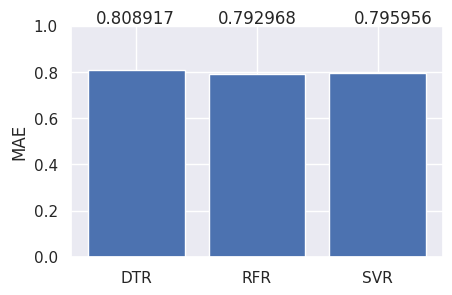

In [ ]:
#@title Comparacion de metodos para escoger el mejor
import numpy as np
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def mejor(X, y):

    # Estimadores con sus respectivos hiperparámetros
    est1 = DecisionTreeRegressor(criterion="poisson",max_depth=3,random_state=21)
    est2 = RandomForestRegressor(criterion="absolute_error",max_depth=1,n_estimators=1,random_state=21)
    est3 = SVR(kernel="poly",C=1,degree=51)

    # Entrenar los estimadores
    est1.fit(X_train, y_train)
    est2.fit(X_train, y_train)
    est3.fit(X_train, y_train)


    # Calcular la exactitud en el conjunto de validación
    score1 = mean_absolute_error(y_test, est1.predict(X_test))
    score2 = mean_absolute_error(y_test, est2.predict(X_test))
    score3 = mean_absolute_error(y_test, est3.predict(X_test))

    return score1, score2, score3

X, y = load_iris(return_X_y=True)

score1, score2, score3 = mejor(X, y)

f = plt.figure(figsize=(12,3))
f.subplots_adjust(wspace=0.5)

ax1 = f.add_subplot(121)
ax1.bar([0,1,2], [score1,score2,score3], capsize=10)
ax1.set_xticks(range(0,3))
ax1.set_xticklabels(('DTR', 'RFR', 'SVR'))
ax1.set_ylabel('MAE')
ax1.text(-0.33, 1.01, str(score1)[:8])
ax1.text(0.68, 1.01, str(score2)[:8])
ax1.text(1.8, 1.01, str(score3)[:8])
ax1.axis(ymin=0, ymax=1)  # Ajuste del rango del eje y
plt.show()

##El mejor metodo de regresión es RandomForestRegressor.